In [47]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [48]:
# Define Solar Plant Data File
faro_plant = pd.read_csv('SunlabFaro_PV2017.csv')

In [49]:
# Ensure Datetime is in datetime format
faro_plant['Datetime'] = pd.to_datetime(faro_plant['Datetime'])

# Sort the data by datetime for readability
faro_plant = faro_plant.sort_values(by='Datetime')

In [50]:
faro_plant.head()

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,B_Vertical - Power DC [W],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Horizontal - Voltage DC [V],B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ÂºC],B_Optimal - Temperature [ÂºC],B_Horizontal - Temperature [ÂºC]
52549,2017-01-20 07:44:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,2.1
158922,2017-01-20 07:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,3.1,2.2
156580,2017-01-20 07:46:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,3.3,2.4
158923,2017-01-20 07:47:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,3.5,2.6
156581,2017-01-20 07:48:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,3.7,2.7


In [51]:
faro_plant.tail()

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,B_Vertical - Power DC [W],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Horizontal - Voltage DC [V],B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ÂºC],B_Optimal - Temperature [ÂºC],B_Horizontal - Temperature [ÂºC]
204164,2017-12-31 17:14:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.1,18.2,18.2
97760,2017-12-31 17:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,18.2,18.1
204166,2017-12-31 17:16:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,18.1,18.0
45841,2017-12-31 17:17:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,18.1,17.9
201027,2017-12-31 17:18:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,18.0,17.8


In [52]:
faro_plant.describe(include='all')

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,B_Vertical - Power DC [W],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Horizontal - Voltage DC [V],B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ÂºC],B_Optimal - Temperature [ÂºC],B_Horizontal - Temperature [ÂºC]
count,206959,200693.000000,200693.000000,200693.000000,202862.000000,202862.000000,202862.000000,202601.000000,202601.000000,202601.000000,...,201762.000000,202646.000000,202646.000000,202646.000000,201652.000000,201652.000000,201652.000000,206959.000000,206959.000000,206959.000000
mean,2017-06-19 11:56:17.361989376+00:00,26.252679,2.170253,61.195009,27.627991,3.577017,100.895601,26.702664,3.310676,91.509276,...,61.445563,26.311485,3.654957,99.696385,26.249369,3.254575,88.996677,29.366513,30.600776,28.673176
min,2017-01-20 07:44:00+00:00,10.950000,0.000000,0.000000,10.400000,0.000000,0.000000,10.350000,0.000000,0.000000,...,0.000000,11.300000,0.000000,0.000000,10.650000,0.000000,0.000000,3.900000,3.000000,2.100000
25%,2017-04-06 08:00:30+00:00,26.600000,0.710000,15.938250,27.300000,1.100000,31.316031,26.900000,1.117500,28.616625,...,14.937438,26.700000,1.082500,27.027000,26.700000,1.105000,26.711875,23.600000,22.600000,21.300000
50%,2017-06-07 15:40:00+00:00,28.000000,1.777500,49.362500,28.100000,3.515000,101.261937,27.650000,3.085000,88.797750,...,47.638500,27.350000,3.487500,98.210250,27.350000,3.030000,86.030000,30.400000,30.800000,28.700000
75%,2017-08-16 08:11:30+00:00,29.250000,3.252500,94.449375,29.000000,5.965000,168.920750,28.850000,5.260000,146.233000,...,94.946781,28.000000,6.215000,169.296063,28.200000,5.175000,143.009750,35.300000,38.700000,36.200000
max,2017-12-31 17:18:00+00:00,34.700000,7.985000,244.295250,35.200000,10.237500,301.106000,35.050000,10.237500,302.693500,...,250.965000,34.850000,10.237500,310.708125,34.150000,10.237500,296.681875,49.300000,58.500000,54.500000
std,NaN,4.549256,1.734714,51.613593,2.637175,2.504926,70.332626,3.881905,2.361044,64.994357,...,53.771722,3.560395,2.623921,71.753362,3.789356,2.318152,63.912738,7.901517,9.933495,9.416995


In [53]:
faro_plant.dtypes

Datetime                            datetime64[ns, UTC]
A_Vertical - Voltage DC [V]                     float64
A_Vertical - Current DC [A]                     float64
A_Vertical - Power DC [W]                       float64
A_Optimal - Voltage DC [V]                      float64
A_Optimal - Current DC [A]                      float64
A_Optimal - Power DC [W]                        float64
A_Horizontal - Voltage DC [V]                   float64
A_Horizontal - Current DC [A]                   float64
A_Horizontal - Power DC [W]                     float64
A_Vertical - Temperature [ÂºC]                  float64
A_Optimal - Temperature [ÂºC]                   float64
A_Horizontal - Temperature [ÂºC]                float64
B_Vertical - Voltage DC [V]                     float64
B_Vertical - Current DC [A]                     float64
B_Vertical - Power DC [W]                       float64
B_Optimal - Voltage DC [V]                      float64
B_Optimal - Current DC [A]                      

<Axes: >

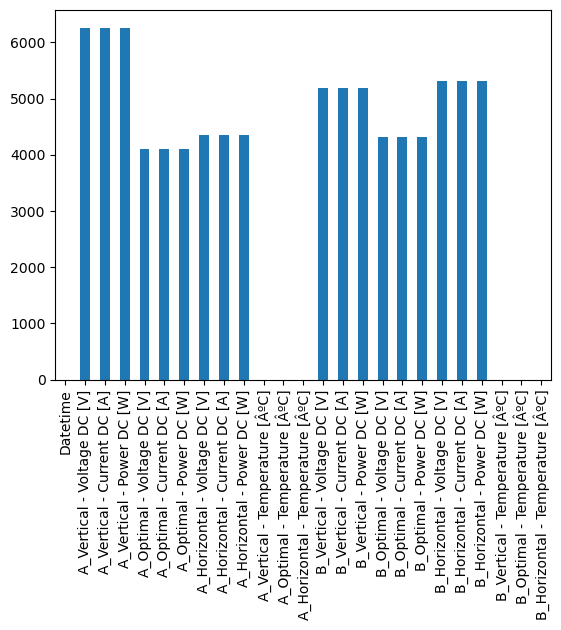

In [54]:
# Plot the columns with missing data
faro_plant.isna().sum().plot.bar()

In [55]:
# Find missing dates on the Solar Plant Data file as we know we're missing about 1/2 the dates compared to Meteo file

# Create full date range for entire 2017 year
full_date_range = pd.date_range(start='2017-01-01', end='2017-12-31', freq='min')

In [56]:
# let's see how many datetimes we're missing
print(f"Number Datetimes from the File: {len(faro_plant['Datetime'])}")
print(f"Number of Datetimes from full range: {len(full_date_range)}")

Number Datetimes from the File: 206959
Number of Datetimes from full range: 524161


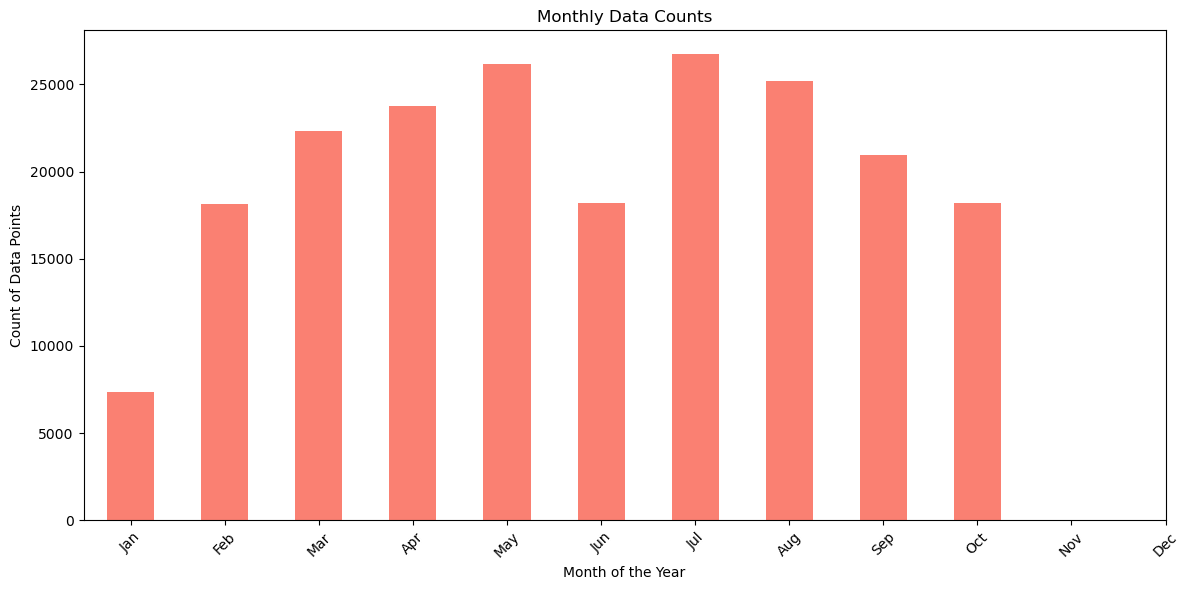

In [57]:
# extract month for plotting
faro_plant['Solar_Month'] = faro_plant['Datetime'].dt.month

# group data by month for plotting
monthly_data_count = faro_plant.groupby('Solar_Month').size()

# Plot bar chart
plt.figure(figsize=(12,6))
monthly_data_count.plot(kind='bar', color='salmon')
plt.title('Monthly Data Counts')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Data Points')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

In [58]:
# Define Meteo Data File
meteo = pd.read_csv('SunlabFaro_Meteo2017.csv')

In [59]:
# Ensure Datetime is in datetime format
meteo['Datetime'] = pd.to_datetime(meteo['Datetime'], utc=True)

# Sort the data by datetime for readability
faro_plant = faro_plant.sort_values(by='Datetime')

In [60]:
meteo.head()

,Datetime,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa]
0,2017-11-30 15:42:00+00:00,15.8,259.47134,43.691956,12.226426,2.416667,14.928540,0.0,1014.9000
1,2017-11-30 15:44:00+00:00,15.8,253.14690,43.624100,11.916634,1.966667,6.463323,0.0,1014.9000
2,2017-11-30 15:45:00+00:00,15.8,249.28926,42.221004,11.753258,1.983333,10.486726,0.0,1014.9334
3,2017-11-30 15:53:00+00:00,15.6,221.78932,41.284544,10.461470,2.733333,13.313776,0.0,1015.0500
4,2017-11-30 15:56:00+00:00,15.6,210.18010,39.046504,9.993262,2.100000,23.013096,0.0,1015.1000


In [61]:
meteo.tail()

,Datetime,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa]
524885,2017-06-15 14:18:00+00:00,24.699998,782.265840,171.677940,49.424068,4.033333,233.655900,0.0,1012.5168
524886,2017-06-18 03:08:00+00:00,24.000000,1.921678,1.786169,0.517321,0.616667,339.041320,0.0,1008.0000
524887,2017-06-15 14:23:00+00:00,25.000000,768.624960,168.265300,48.537824,3.600000,229.160180,0.0,1012.5000
524888,2017-06-18 04:44:00+00:00,24.199998,30.537562,23.072266,2.847299,0.550000,40.810316,0.0,1008.4000
524889,2017-06-18 04:49:00+00:00,24.400000,38.783488,27.105698,3.314297,0.216667,170.323020,0.0,1008.4000


In [62]:
meteo.describe(include='all')

,Datetime,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa]
count,524890,5.248900e+05,524890.000000,524890.000000,524890.000000,5.248900e+05,524890.000000,524890.000000,5.248900e+05
mean,2017-07-02 10:55:16.814266112+00:00,-5.696618e+03,229.720337,63.373129,13.937115,-5.713284e+03,206.477602,0.000697,-4.699446e+03
min,2017-01-01 00:00:00+00:00,-1.500000e+09,0.731202,1.590219,0.497415,-1.500000e+09,0.000000,0.000000,-1.499999e+09
25%,2017-04-02 04:59:15+00:00,1.460000e+01,1.561721,1.701220,0.510380,1.233333e+00,111.671125,0.000000,1.012583e+03
50%,2017-07-02 10:58:30+00:00,1.870000e+01,8.294550,7.991072,1.088643,2.066667e+00,231.518870,0.000000,1.015483e+03
75%,2017-10-01 16:58:45+00:00,2.330000e+01,442.262700,96.588342,25.079519,2.950000e+00,304.295110,0.000000,1.019000e+03
max,2017-12-31 23:00:00+00:00,3.790000e+01,1484.379800,715.146720,85.515376,1.165000e+01,359.999280,2.030000,1.035900e+03
std,NaN,2.928004e+06,315.990218,92.295267,18.942142,2.928004e+06,104.699963,0.015156,2.928004e+06


In [63]:
meteo.dtypes

Datetime                      datetime64[ns, UTC]
Ambient Temperature [ÂºC]                 float64
Global Radiation [W/m2]                   float64
Diffuse Radiation [W/m2]                  float64
Ultraviolet [W/m2]                        float64
Wind Velocity [m/s]                       float64
Wind Direction [Âº]                       float64
Precipitation [mm]                        float64
Atmospheric pressure [hPa]                float64
dtype: object

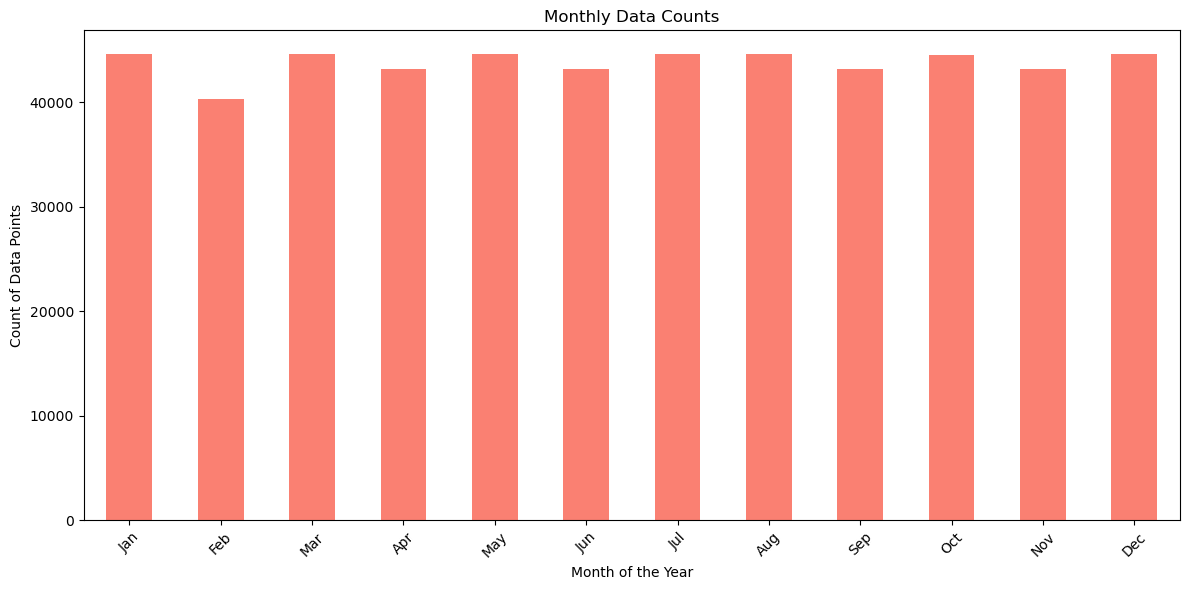

In [64]:
# extract month for plotting
meteo['Meteo_Month'] = meteo['Datetime'].dt.month

# group data by month for plotting
monthly_data_count_meteo = meteo.groupby('Meteo_Month').size()

# Plot bar chart
plt.figure(figsize=(12,6))
monthly_data_count_meteo.plot(kind='bar', color='salmon')
plt.title('Monthly Data Counts')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Data Points')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

In [65]:
# Filter Meteo data for dates that match solar plant data
meteo_date_align = meteo[meteo['Datetime'].isin(faro_plant['Datetime'])]

In [66]:
# Let's merge the datesets together based on dates
merged_solar_data = pd.merge(faro_plant, meteo_date_align, on='Datetime', how='inner')

In [67]:
merged_solar_data.head()

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,Solar_Month,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa],Meteo_Month
0,2017-01-20 07:44:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4.333334,3.768663,3.919803,0.932386,2.550000,332.98428,0.0,1013.7000,1
1,2017-01-20 07:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4.400000,4.105818,3.610701,0.975646,2.583333,351.58204,0.0,1013.7668,1
2,2017-01-20 07:46:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4.500000,4.812986,4.285762,1.022330,3.533334,332.46826,0.0,1013.7668,1
3,2017-01-20 07:47:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4.616667,5.003218,4.845267,1.072026,3.166667,334.99948,0.0,1013.8000,1
4,2017-01-20 07:48:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4.733333,5.030598,5.210974,1.123323,3.600000,326.50778,0.0,1013.7334,1


In [70]:
merged_solar_data.columns

Index(['Datetime', 'A_Vertical - Voltage DC [V]',
       'A_Vertical - Current DC [A]', 'A_Vertical - Power DC [W]',
       'A_Optimal - Voltage DC [V]', 'A_Optimal - Current DC [A]',
       'A_Optimal - Power DC [W]', 'A_Horizontal - Voltage DC [V]',
       'A_Horizontal - Current DC [A]', 'A_Horizontal - Power DC [W]',
       'A_Vertical - Temperature [ÂºC]', 'A_Optimal - Temperature [ÂºC]',
       'A_Horizontal - Temperature [ÂºC]', 'B_Vertical - Voltage DC [V]',
       'B_Vertical - Current DC [A]', 'B_Vertical - Power DC [W]',
       'B_Optimal - Voltage DC [V]', 'B_Optimal - Current DC [A]',
       'B_Optimal - Power DC [W]', 'B_Horizontal - Voltage DC [V]',
       'B_Horizontal - Current DC [A]', 'B_Horizontal - Power DC [W]',
       'B_Vertical - Temperature [ÂºC]', 'B_Optimal - Temperature [ÂºC]',
       'B_Horizontal - Temperature [ÂºC]', 'Solar_Month',
       'Ambient Temperature [ÂºC]', 'Global Radiation [W/m2]',
       'Diffuse Radiation [W/m2]', 'Ultraviolet [W/m2]', 'Win

In [73]:
# Count records with missing A Vertical Voltage DC data
missing_solar_count = merged_solar_data['A_Vertical - Voltage DC [V]'].isna().sum()
print(missing_solar_count)

6266


In [74]:
# We're only missing 6266 records where the first column is NaN out of over 200K records. Safe to drop these records
solar_cleaned = merged_solar_data.dropna(subset=['A_Vertical - Voltage DC [V]'])

In [75]:
solar_cleaned.head()

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,Solar_Month,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa],Meteo_Month
8,2017-01-20 07:52:00+00:00,19.25,0.0750,1.44375,21.60,0.1075,2.322000,18.80,0.0650,1.222,...,1,4.900000,7.267174,6.914082,1.353073,3.600000,331.65972,0.0,1013.7668,1
9,2017-01-20 07:53:00+00:00,19.25,0.0850,1.63625,32.15,0.0450,1.446750,18.80,0.0725,1.363,...,1,4.983333,8.119104,7.055244,1.416638,3.900000,330.66696,0.0,1013.7668,1
10,2017-01-20 07:54:00+00:00,19.20,0.1175,2.25600,32.75,0.0450,1.473750,18.75,0.0800,1.500,...,1,5.000000,8.641460,8.173192,1.483865,3.550000,330.99438,0.0,1013.7834,1
11,2017-01-20 07:55:00+00:00,19.30,0.2775,5.35575,32.95,0.1650,5.436750,18.75,0.1000,1.875,...,1,5.000000,9.611446,8.830058,1.548960,3.500000,330.83166,0.0,1013.8000,1
12,2017-01-20 07:56:00+00:00,19.20,0.4900,9.40800,30.15,0.4375,13.190625,18.85,0.1200,2.262,...,1,5.000000,12.314148,10.599564,1.618800,4.316667,332.66656,0.0,1013.7834,1


In [76]:
solar_cleaned.tail()

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,Solar_Month,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa],Meteo_Month
206935,2017-12-31 16:57:00+00:00,26.70,0.0300,0.80100,29.45,0.0325,0.957125,19.05,0.0925,1.762125,...,12,16.800002,14.352264,13.914030,1.323520,5.100000,298.50012,0.0,1026.4166,12
206936,2017-12-31 16:58:00+00:00,26.35,0.0300,0.79050,29.30,0.0350,1.025500,19.05,0.0900,1.714500,...,12,16.800002,13.566784,13.608252,1.285211,3.850001,276.45834,0.0,1026.4500,12
206937,2017-12-31 16:59:00+00:00,25.80,0.0275,0.70950,17.75,0.0850,1.508750,19.05,0.0850,1.619250,...,12,16.800002,13.325932,13.177236,1.243477,4.450000,276.37098,0.0,1026.4834,12
206938,2017-12-31 17:00:00+00:00,24.70,0.0275,0.67925,28.60,0.0350,1.001000,18.95,0.0750,1.421250,...,12,16.800002,12.727142,12.790736,1.215823,4.966667,295.83680,0.0,1026.5000,12
206939,2017-12-31 17:01:00+00:00,21.40,0.0325,0.69550,28.10,0.0350,0.983500,28.55,0.0250,0.713750,...,12,16.800002,11.669994,11.455128,1.205234,4.416667,295.66842,0.0,1026.5000,12


In [77]:
solar_cleaned.describe(include='all')

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,Solar_Month,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa],Meteo_Month
count,200691,200691.000000,200691.000000,200691.000000,199579.000000,199579.000000,199579.000000,199283.000000,199283.000000,199283.000000,...,200691.000000,2.006910e+05,200691.000000,200691.000000,200691.000000,2.006910e+05,200691.000000,200691.000000,2.006910e+05,200691.000000
mean,2017-06-19 13:23:06.762336256+00:00,26.252711,2.170268,61.195466,27.672670,3.609545,101.817063,26.764464,3.341343,92.362392,...,6.100732,-7.452739e+03,466.277091,130.105883,28.000593,-7.471522e+03,190.674038,0.000854,-6.458668e+03,6.100732
min,2017-01-20 07:52:00+00:00,10.950000,0.000000,0.000000,14.100000,0.000000,0.000000,10.350000,0.000000,0.000000,...,1.000000,-1.500000e+09,0.742100,1.626869,0.501335,-1.500000e+09,0.000000,0.000000,-1.499999e+09,1.000000
25%,2017-04-06 11:01:30+00:00,26.600000,0.710000,15.938250,27.350000,1.155000,32.892125,26.900000,1.157500,30.195812,...,4.000000,1.700000e+01,176.418180,61.527104,10.656561,1.750000e+00,116.835870,0.000000,1.012217e+03,4.000000
50%,2017-06-07 18:21:00+00:00,28.000000,1.777500,49.362500,28.100000,3.570000,102.730500,27.700000,3.127500,89.915625,...,6.000000,2.150000e+01,450.278240,99.891704,25.853592,2.566667e+00,201.998480,0.000000,1.014833e+03,6.000000
75%,2017-08-16 06:59:30+00:00,29.250000,3.252500,94.449375,29.000000,5.977500,169.248750,28.850000,5.285000,146.740750,...,8.000000,2.598333e+01,732.958640,174.707150,43.844202,3.416667e+00,261.038170,0.000000,1.018517e+03,8.000000
max,2017-12-31 17:01:00+00:00,34.700000,7.985000,244.295250,35.200000,10.237500,301.106000,35.050000,10.237500,302.693500,...,12.000000,3.790000e+01,1484.379800,715.146720,85.515376,1.030000e+01,359.999200,2.030000,1.035900e+03,12.000000
std,NaN,4.549251,1.734715,51.613642,2.568639,2.493434,69.999130,3.818173,2.350694,64.697268,...,3.033477,3.348323e+06,321.235595,104.449213,19.605319,3.348323e+06,85.926610,0.017064,3.348323e+06,3.033477


In [79]:
# Looks like we're still missing data from some of the Solar Plant columns, Let's fill in the values using the previous value since
# We're reporting on a 1 minute increment
filled_data = solar_cleaned.ffill()

In [80]:
filled_data.describe(include='all')

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,Solar_Month,Ambient Temperature [ÂºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [Âº],Precipitation [mm],Atmospheric pressure [hPa],Meteo_Month
count,200691,200691.000000,200691.000000,200691.000000,200691.000000,200691.000000,200691.000000,200691.000000,200691.000000,200691.000000,...,200691.000000,2.006910e+05,200691.000000,200691.000000,200691.000000,2.006910e+05,200691.000000,200691.000000,2.006910e+05,200691.000000
mean,2017-06-19 13:23:06.762336256+00:00,26.252711,2.170268,61.195466,27.672007,3.609247,101.808639,26.763465,3.339548,92.314335,...,6.100732,-7.452739e+03,466.277091,130.105883,28.000593,-7.471522e+03,190.674038,0.000854,-6.458668e+03,6.100732
min,2017-01-20 07:52:00+00:00,10.950000,0.000000,0.000000,14.100000,0.000000,0.000000,10.350000,0.000000,0.000000,...,1.000000,-1.500000e+09,0.742100,1.626869,0.501335,-1.500000e+09,0.000000,0.000000,-1.499999e+09,1.000000
25%,2017-04-06 11:01:30+00:00,26.600000,0.710000,15.938250,27.350000,1.155000,32.865437,26.900000,1.157500,30.126938,...,4.000000,1.700000e+01,176.418180,61.527104,10.656561,1.750000e+00,116.835870,0.000000,1.012217e+03,4.000000
50%,2017-06-07 18:21:00+00:00,28.000000,1.777500,49.362500,28.100000,3.570000,102.711000,27.700000,3.125000,89.848500,...,6.000000,2.150000e+01,450.278240,99.891704,25.853592,2.566667e+00,201.998480,0.000000,1.014833e+03,6.000000
75%,2017-08-16 06:59:30+00:00,29.250000,3.252500,94.449375,29.000000,5.977500,169.261250,28.850000,5.282500,146.701500,...,8.000000,2.598333e+01,732.958640,174.707150,43.844202,3.416667e+00,261.038170,0.000000,1.018517e+03,8.000000
max,2017-12-31 17:01:00+00:00,34.700000,7.985000,244.295250,35.200000,10.237500,301.106000,35.050000,10.237500,302.693500,...,12.000000,3.790000e+01,1484.379800,715.146720,85.515376,1.030000e+01,359.999200,2.030000,1.035900e+03,12.000000
std,NaN,4.549251,1.734715,51.613642,2.569127,2.493775,70.009946,3.818305,2.351136,64.710356,...,3.033477,3.348323e+06,321.235595,104.449213,19.605319,3.348323e+06,85.926610,0.017064,3.348323e+06,3.033477


In [81]:
# Now that we have a consistent count of records, let's export to CSV for use
filled_data.to_csv('SunLab_Faro_Cleaned.csv', index=False, encoding='utf-8')